# Índice

[Import do DataFrame original - População e Score](#Import-do-DataFrame-original---População-e-Score)

[Base Evento](#Base-Evento)

[Testando incremento do Score Inadimplência em cada produto](#Testando-incremento-do-Score-Inadimplência-em-cada-produto)

[Consórcio Auto](#Consórcio-Auto)

[Seguro Residencial](#Seguro-Residencial)

[SEGURO VIDA](#SEGURO-VIDA)


In [14]:
import numpy as np
import pandas as pd
import os
import math

In [15]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
import matplotlib.pyplot as plt

In [19]:
os.chdir('C://Users//i369431//Documents//PoC - DataHolics//Validação Score Inadinplência') #Setting work directory

# C:\Users\i369431\Documents\Projeto - projeção de saldo


### Import do DataFrame original - População e Score

[Índice](#Índice)


In [20]:
df_Raw = pd.read_csv('Valida_Score_vs_Score_Prop.txt', sep = '\t', decimal = ',', encoding = 'utf-8')

C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,2,4,17,18,20,25,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df_Raw = df_Raw[df_Raw.CCPF_CNPJ != '?']

In [22]:
df_Raw.head(15)

CCPF_CNPJ         Score_Consorcio_Auto              Score_Seguro_RE  \
0   44890966587  0,0070728281003844132093783  0,3786373112380327365933397   
1   01733136398  0,5748509755078163863117879  0,2942539902972942100767284   
2   00833572628  0,9994995421079744257752964  0,0000000000000254458559855   
3   37161961858  0,1944373716993124390217673  0,1084435706625551526505191   
4   00198090269  0,6091081787666818847526429  0,1481093872899139352039555   
5   53710630568  0,0026248996855090644259034  0,2238978865448309485408629   
6   54105781715  0,4081339502697841625789010  0,0726529994242187254771537   
7   04880574422  0,8363095337698939202297765  0,7981074505816905251265325   
8   78833060497  0,0097068382253303713003145  0,8435348123420077781631221   
9   07332011646  0,7082766429379029338164742  0,3741099759929924495338582   
10  02820318479  0,9992336441178883976732550  0,9999986833638826455583626   
11  95764321891  0,7158553916524612592553467  0,2136193730364538689858733   
12  70662722183  0,4702137372731348130550089  0,5707963111549396728605643   
13  16569415387  0,1750469027271287780767040  0,9890938082391951269300989   
14  03165914753  0,0858179861276664873726006  0,0782194018499676041455970   

       Score_Cartao_Credito_Uso             Score_Lime_posse  \
0   0,0102666394717490314786312  0,1978786656287843670476434   
1   0,9999999951772650108594576  0,0007043905987642102477578   
2   0,9976919705782939518101671  0,0002320099888412031278843   
3   0,9952476497039475233918893  0,0858898283935893985807652   
4   0,9924865877106745504221408  0,7427263713545565471108034   
5   0,0055942581744329025403295  0,0450798073616082636827507   
6   0,9907225883560837331742732  0,5812147175768643814208758   
7   0,9829801675962382967455255  0,5778040405796173173413877   
8   0,0187287542754154788526844  0,1446166525670563585137529   
9   0,9505987932848295463017507  0,8536845137177005993223133   
10  0,9833813349924063196283441  0,4132884826324232929728453   
11  0,9987170365082117529098582  0,4716625369102225295847575   
12  0,9998375000057407868681025  0,0360298620520184895155147   
13  0,9921581550117353209827797  0,7370366296977569620096915   
14  0,9971215237184246626966910  0,0831556308274526978507879   

   Score_Desconto_Duplicatas                 Score_Fundos  \
0                          ?                            ?   
1                          ?  0,0034264442362558194393740   
2                          ?  0,7158960901122501940818665   
3                          ?  0,0857726614805050108225615   
4                          ?  0,2194469832148239207825213   
5                          ?                            ?   
6                          ?  0,6650719251417491761912970   
7                          ?  0,1268913615644116088532201   
8                          ?                            ?   
9                          ?  0,8072972369017223925879989   
10                         ?  0,9978782728216133435239499   
11                         ?  0,9817418198256372408039283   
12                         ?  0,0030583826214286946414134   
13                         ?  0,8542202316945978202156198   
14                         ?  0,5383272426882323991037538   

                 Score_Poupanca             Score_HiperFundo  \
0                             ?                            ?   
1   0,0146114562342280727980093  0,0145016076590318218619835   
2   1,0000000000000000000000000  0,4174029808093115967437825   
3   0,8482364731094904630737119  0,3338291890224219793381621   
4   0,4605070908684659181098198  0,2003755744314670017569568   
5                             ?                            ?   
6   0,9738195230526469625687014  0,6704070777949209247736917   
7   0,4404320516073986224725445  0,1008029605990619914646089   
8                             ?                            ?   
9   0,4801170070031002823363053  0,5683381031141720995947253   
10  0,6231963501070195698972043  0,9994855618422883170026694   
11 

In [23]:
Score_list = list(set(df_Raw.columns) - set(['CCPF_CNPJ']))

In [24]:
for i in Score_list:
    print(i)
    df_Raw[i] = df_Raw[i].astype(str)
    df_Raw[i] = [x.replace(',', '.') for x in df_Raw[i]]
    df_Raw[i] = [x.replace('?', '0') for x in df_Raw[i]]
    df_Raw[i] = df_Raw[i].astype(float)
    

Score_Credito_Consig_INSS
Score_Seguro_RE
Score_Credito_Consig_Publico
Score_Credito_Imobiliario
Score_Cartao_Credito_Adic_Segband_Up
Score_Lime_posse
Score_Cagiro
Score_Consorcio_Auto
Score_Consorcio_CamTrator
Score_Seguro_Auto
Score_Seguro_Saude
Score_Lime_Uso
Score_Consorcio_Imovel
Score_Inadimplencia
Score_Poupanca
Score_Cheque_Especial_Uso
Score_Desconto_Duplicatas
Score_Investimentos
Score_CDB
Score_Credito_Consig_Privado
Score_Fundos
Score_Cartao_Credito_Posse
Score_Seguro_Vida
Score_Capitalizacao
Score_Cartao_Credito_Novo
Score_Previdencia
Score_Parcelamento_Fatura
Score_CDC_Outros_Bens
Score_HiperFundo
Score_Credito_Pessoal
Score_CDC_Veiculos
Score_Cartao_Credito_Uso
Score_CDC_Auto


In [25]:
df_Raw.head(15)

CCPF_CNPJ  Score_Consorcio_Auto  Score_Seguro_RE  \
0   44890966587              0.007073     3.786373e-01   
1   01733136398              0.574851     2.942540e-01   
2   00833572628              0.999500     2.544586e-14   
3   37161961858              0.194437     1.084436e-01   
4   00198090269              0.609108     1.481094e-01   
5   53710630568              0.002625     2.238979e-01   
6   54105781715              0.408134     7.265300e-02   
7   04880574422              0.836310     7.981075e-01   
8   78833060497              0.009707     8.435348e-01   
9   07332011646              0.708277     3.741100e-01   
10  02820318479              0.999234     9.999987e-01   
11  95764321891              0.715855     2.136194e-01   
12  70662722183              0.470214     5.707963e-01   
13  16569415387              0.175047     9.890938e-01   
14  03165914753              0.085818     7.821940e-02   

    Score_Cartao_Credito_Uso  Score_Lime_posse  Score_Desconto_Duplicatas  \
0                   0.010267          0.197879                        0.0   
1                   1.000000          0.000704                        0.0   
2                   0.997692          0.000232                        0.0   
3                   0.995248          0.085890                        0.0   
4                   0.992487          0.742726                        0.0   
5                   0.005594          0.045080                        0.0   
6                   0.990723          0.581215                        0.0   
7                   0.982980          0.577804                        0.0   
8                   0.018729          0.144617                        0.0   
9                   0.950599          0.853685                        0.0   
10                  0.983381          0.413288                        0.0   
11                  0.998717          0.471663                        0.0   
12                  0.999838          0.036030                        0.0   
13                  0.992158          0.737037                        0.0   
14                  0.997122          0.083156                        0.0   

    Score_Fundos  Score_Poupanca  Score_HiperFundo  Score_Consorcio_CamTrator  \
0       0.000000        0.000000          0.000000                   0.000000   
1       0.003426        0.014611          0.014502                   0.535793   
2       0.715896        1.000000          0.417403                   0.989248   
3       0.085773        0.848236          0.333829                   0.033064   
4       0.219447        0.460507          0.200376                   0.412633   
5       0.000000        0.000000          0.000000                   0.000000   
6       0.665072        0.973820          0.670407                   0.134092   
7       0.126891        0.440432          0.100803                   0.399134   
8       0.000000        0.000000          0.000000                   0.000000   
9       0.807297        0.480117          0.568338                   0.590586   
10      0.997878        0.623196          0.999486                   0.693919   
11      0.981742        0.999424          0.959829                   0.690186   
12      0.003058        0.328916          0.013678                   0.210517   
13      0.854220        0.699914          0.581572                   0.144930   
14      0.538327        0.938392          0.589197                   0.083901   

           ...           Score_Lime_Uso  Score_Parcelamento_Fatura  \
0          ...             6.123128e-02               1.480092e-01   
1          ...             6.502066e-01               6.634424e-02   
2          ...             2.787521e-11               4.994115e-13   
3          ...             2.584172e-01               1.149026e-01   
4          ...             2.882269e-01               2.986907e-01   
5          ...             2.658128e-02               4.926876e-01   
6          ...             1.276700e-01               1.9

In [26]:
Score_Prop = list(set(df_Raw.columns) - set(['CCPF_CNPJ', 'Score_Inadimplencia']))

In [27]:
Corr_Scores = pd.DataFrame(df_Raw[Score_Prop].corrwith(df_Raw.Score_Inadimplencia))
Corr_Scores.reset_index(inplace = True)

In [28]:
Corr_Scores.columns =['Scores', 'Correlãção_Inadimplência']
Corr_Scores

Scores  Correlãção_Inadimplência
0              Score_Credito_Consig_INSS                 -0.044751
1                        Score_Seguro_RE                  0.028867
2           Score_Credito_Consig_Publico                 -0.038072
3              Score_Credito_Imobiliario                  0.000856
4   Score_Cartao_Credito_Adic_Segband_Up                  0.008877
5                       Score_Lime_posse                 -0.037218
6                           Score_Cagiro                       NaN
7                   Score_Consorcio_Auto                 -0.019814
8              Score_Consorcio_CamTrator                  0.000723
9                      Score_Seguro_Auto                  0.046797
10                    Score_Seguro_Saude                       NaN
11                        Score_Lime_Uso                 -0.031688
12                Score_Consorcio_Imovel                  0.046849
13                        Score_Poupanca                 -0.046149
14             Score_Cheque_Especial_Uso                 -0.000973
15             Score_Desconto_Duplicatas                       NaN
16                   Score_Investimentos                  0.043089
17                             Score_CDB                  0.001277
18          Score_Credito_Consig_Privado                  0.018292
19                          Score_Fundos                 -0.010255
20            Score_Cartao_Credito_Posse                 -0.054677
21                     Score_Seguro_Vida                  0.013484
22                   Score_Capitalizacao                  0.004073
23             Score_Cartao_Credito_Novo                 -0.019929
24                     Score_Previdencia                  0.049009
25             Score_Parcelamento_Fatura                  0.012687
26                 Score_CDC_Outros_Bens                  0.014535
27                      Score_HiperFundo                 -0.019327
28                 Score_Credito_Pessoal                 -0.048285
29                    Score_CDC_Veiculos                  0.061045
30              Score_Cartao_Credito_Uso                 -0.073443
31                        Score_CDC_Auto                 -0.026245

In [29]:
print(df_Raw.Score_Inadimplencia.min())
print(df_Raw.Score_Inadimplencia.max())

372.117638737236
905.755742606142


Score_Credito_Consig_INSS


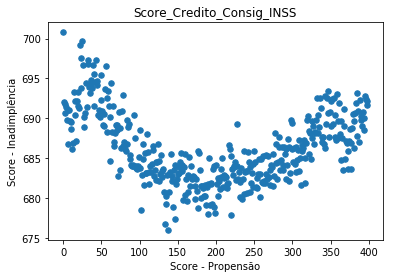

Score_Seguro_RE


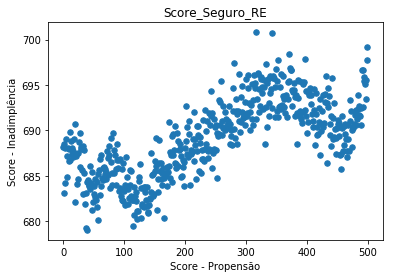

Score_Credito_Consig_Publico


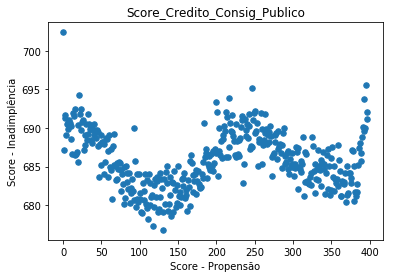

Score_Credito_Imobiliario


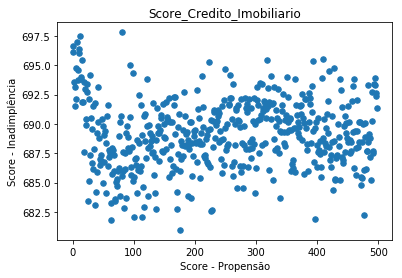

Score_Cartao_Credito_Adic_Segband_Up


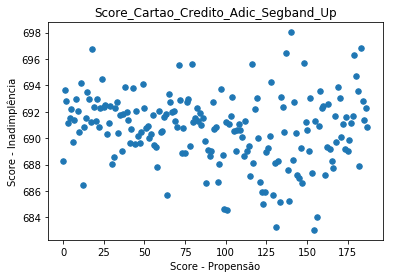

Score_Lime_posse


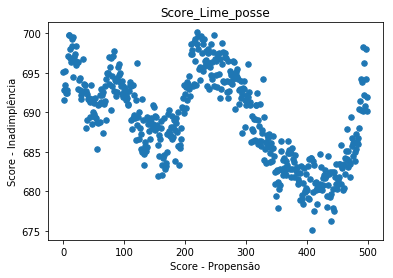

Score_Cagiro


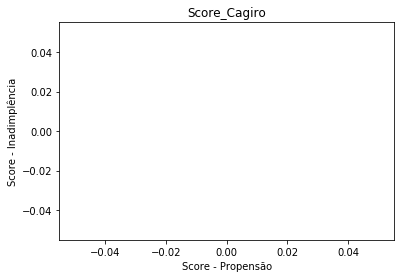

Score_Consorcio_Auto


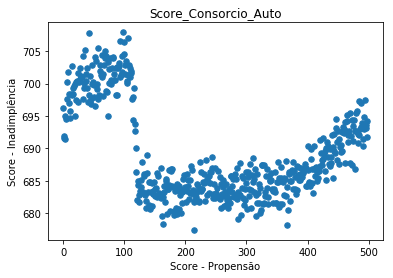

Score_Consorcio_CamTrator


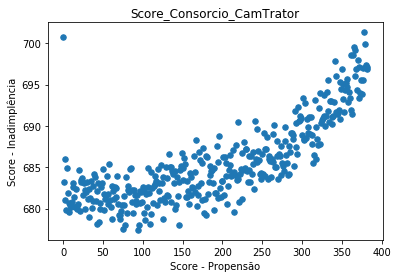

Score_Seguro_Auto


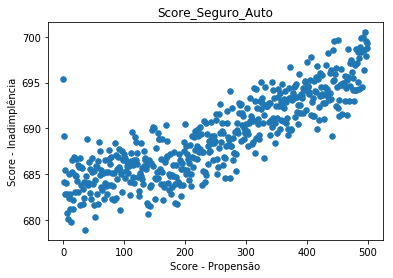

Score_Seguro_Saude


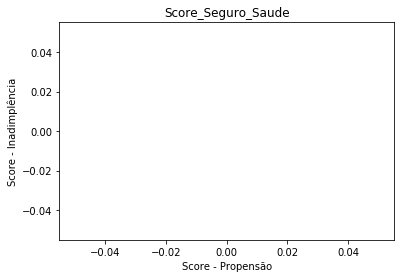

Score_Lime_Uso


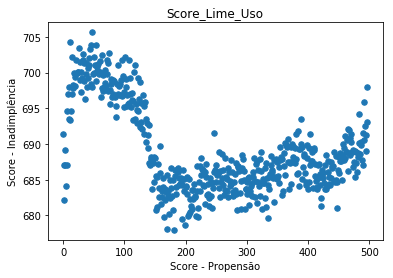

Score_Consorcio_Imovel


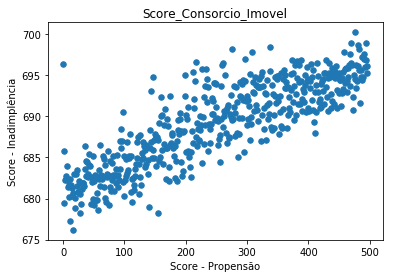

Score_Poupanca


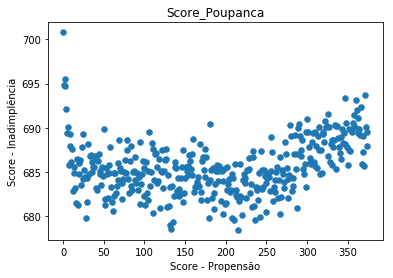

Score_Cheque_Especial_Uso


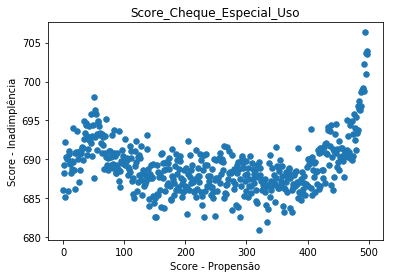

Score_Desconto_Duplicatas


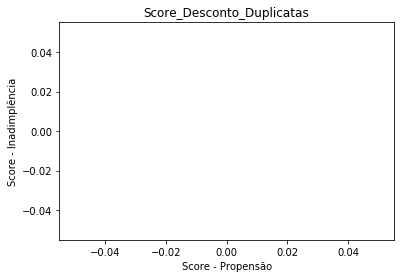

Score_Investimentos


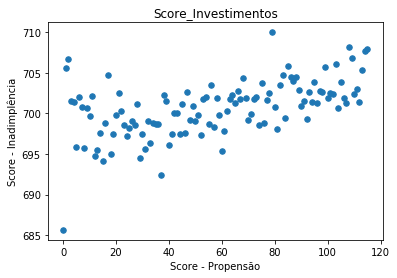

Score_CDB


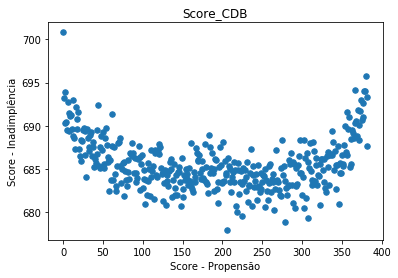

Score_Credito_Consig_Privado


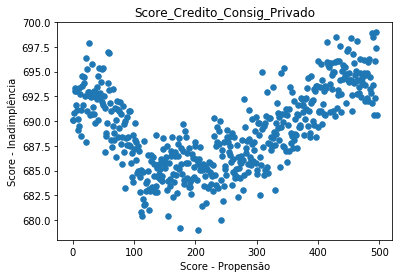

Score_Fundos


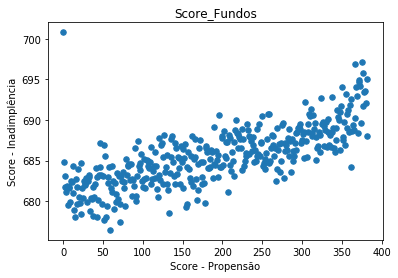

Score_Cartao_Credito_Posse


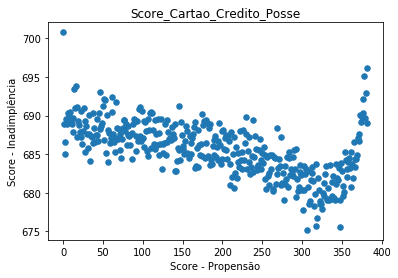

Score_Seguro_Vida


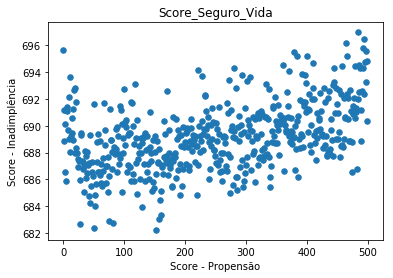

Score_Capitalizacao


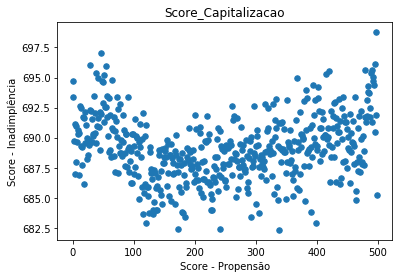

Score_Cartao_Credito_Novo


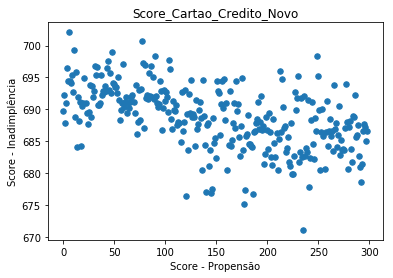

Score_Previdencia


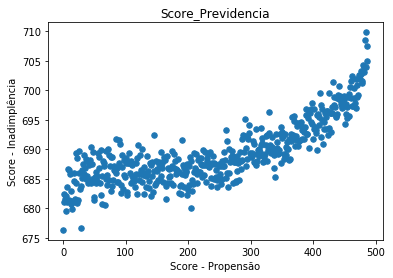

Score_Parcelamento_Fatura


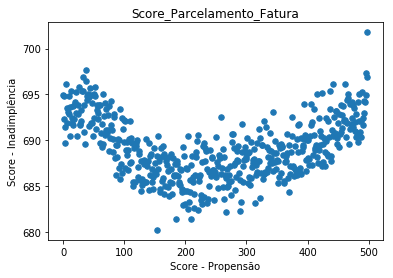

Score_CDC_Outros_Bens


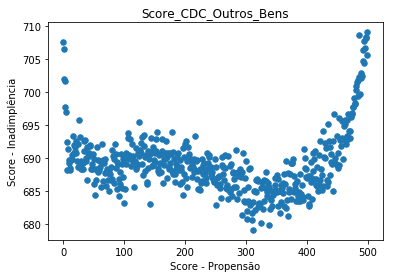

Score_HiperFundo


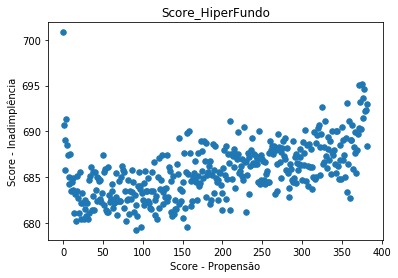

Score_Credito_Pessoal


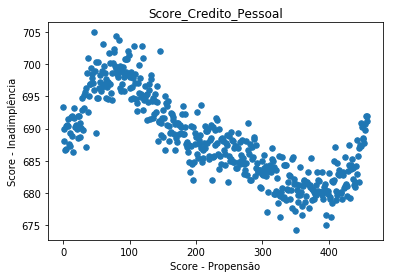

Score_CDC_Veiculos


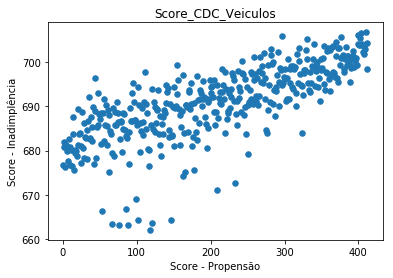

Score_Cartao_Credito_Uso


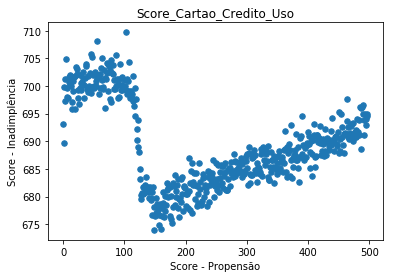

Score_CDC_Auto


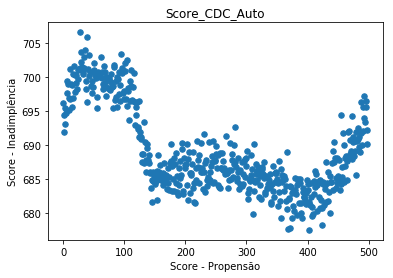

In [30]:
for i in Score_Prop:
    print (i)
    Decil = i+str('_Decil')
    df_Raw[Decil] = pd.qcut(df_Raw[i], 500, labels = False, duplicates = 'drop')
    df_to_print = df_Raw[[Decil,'Score_Inadimplencia']]
    df_mean = df_to_print.groupby(Decil).mean()
    plt.scatter(df_mean.index, df_mean.Score_Inadimplencia, s=30)
    plt.xlabel('Score - Propensão')
    plt.title(i)
    plt.ylabel('Score - Inadimplência')
    plt.show()  

## Base Evento

[Índice](#Índice)

In [31]:
df_evento = pd.read_csv('Valida_Score_Inad_Evento.txt', sep = '\t', decimal = ',', encoding = 'utf-8')

In [32]:
df_evento.head()

CCPF_CNPJ                  Produto  EVENTO
0  94247234587              SEGURO VIDA       1
1    227244001                      CDB       1
2  10363940774              SEGURO VIDA       1
3   1093602813            CAPITALIZACAO       1
4    855422297  CRPE-CONSIGNADO PRIVADO       1

In [33]:
df_evento.EVENTO.unique()

array([1], dtype=int64)

In [34]:
df_evento.shape

(8444320, 3)

In [35]:
df_evento.Produto.unique()

array(['SEGURO VIDA', 'CDB', 'CAPITALIZACAO', 'CRPE-CONSIGNADO PRIVADO',
       'CRPE-LIME', 'CDC-VEÍCULOS', 'SEGURO_VIDA', 'SEGURO RE',
       'CRPE-CONSIGNADO PÚBLICO', 'SEGURO AUTO', 'SEGURO_SAUDE',
       'CHEQUE ESPECIAL', 'CRPE-NORMAL', 'SEGURO_AUTO', 'CAGIRO-NORMAL',
       'CONSORCIO_AUTO', 'SEGURO_RE', 'PREVIDENCIA', 'HIPERFUNDO',
       'CARTAO ADICIONAL', 'CDC-OUTROS BENS', 'CREDITO IMOBILIARIO',
       'CONSORCIO_IMOVEL'], dtype=object)

In [36]:
del df_evento

In [37]:
del df_Raw

## Testando incremento do Score Inadimplência em cada produto

[Índice](#Índice)

In [38]:
df_Var = pd.read_csv('Valida_Score_vs_Score_Prop.txt', 
                     sep = '\t', 
                     decimal = ',', 
                     encoding = 'utf-8')

In [39]:
df_Var = df_Var[df_Var.CCPF_CNPJ != '?']

In [40]:
df_Var.CCPF_CNPJ = df_Var['CCPF_CNPJ'].astype(str)

### Consórcio Auto

[Índice](#Índice)

In [41]:
df_evento = pd.read_csv('Valida_Score_Inad_Evento.txt', sep = '\t', decimal = ',', encoding = 'utf-8')
df_evento = df_evento[df_evento.Produto == 'CREDITO IMOBILIARIO']
df_evento.CCPF_CNPJ = df_evento['CCPF_CNPJ'].astype(str)

In [42]:
df_Raw = pd.merge(df_Var,df_evento, 
                  how = 'left',
                  left_on = ['CCPF_CNPJ'],
                  right_on = ['CCPF_CNPJ'])

In [43]:
df_Raw.EVENTO.fillna(0,inplace=True)

In [44]:
df_Raw.EVENTO.unique()

array([0., 1.])

In [45]:
df_Raw.head(10)

CCPF_CNPJ         Score_Consorcio_Auto              Score_Seguro_RE  \
0  44890966587  0,0070728281003844132093783  0,3786373112380327365933397   
1  01733136398  0,5748509755078163863117879  0,2942539902972942100767284   
2  00833572628  0,9994995421079744257752964  0,0000000000000254458559855   
3  37161961858  0,1944373716993124390217673  0,1084435706625551526505191   
4  00198090269  0,6091081787666818847526429  0,1481093872899139352039555   
5  53710630568  0,0026248996855090644259034  0,2238978865448309485408629   
6  54105781715  0,4081339502697841625789010  0,0726529994242187254771537   
7  04880574422  0,8363095337698939202297765  0,7981074505816905251265325   
8  78833060497  0,0097068382253303713003145  0,8435348123420077781631221   
9  07332011646  0,7082766429379029338164742  0,3741099759929924495338582   

      Score_Cartao_Credito_Uso             Score_Lime_posse  \
0  0,0102666394717490314786312  0,1978786656287843670476434   
1  0,9999999951772650108594576  0,0007043905987642102477578   
2  0,9976919705782939518101671  0,0002320099888412031278843   
3  0,9952476497039475233918893  0,0858898283935893985807652   
4  0,9924865877106745504221408  0,7427263713545565471108034   
5  0,0055942581744329025403295  0,0450798073616082636827507   
6  0,9907225883560837331742732  0,5812147175768643814208758   
7  0,9829801675962382967455255  0,5778040405796173173413877   
8  0,0187287542754154788526844  0,1446166525670563585137529   
9  0,9505987932848295463017507  0,8536845137177005993223133   

  Score_Desconto_Duplicatas                 Score_Fundos  \
0                         ?                            ?   
1                         ?  0,0034264442362558194393740   
2                         ?  0,7158960901122501940818665   
3                         ?  0,0857726614805050108225615   
4                         ?  0,2194469832148239207825213   
5                         ?                            ?   
6                         ?  0,6650719251417491761912970   
7                         ?  0,1268913615644116088532201   
8                         ?                            ?   
9                         ?  0,8072972369017223925879989   

                Score_Poupanca             Score_HiperFundo  \
0                            ?                            ?   
1  0,0146114562342280727980093  0,0145016076590318218619835   
2  1,0000000000000000000000000  0,4174029808093115967437825   
3  0,8482364731094904630737119  0,3338291890224219793381621   
4  0,4605070908684659181098198  0,2003755744314670017569568   
5                            ?                            ?   
6  0,9738195230526469625687014  0,6704070777949209247736917   
7  0,4404320516073986224725445  0,1008029605990619914646089   
8                            ?                            ?   
9  0,4801170070031002823363053  0,5683381031141720995947253   

     Score_Consorcio_CamTrator  ...              Score_Previdencia  \
0                            ?  ...    0,0043693268959892556449476   
1  0,5357934929901486675873912  ...    0,0005860427413823148575650   
2  0,9892482605203157808304582  ...    0,0031770050427728500387625   
3  0,0330640104443939084055692  ...    0,0014853849001293024413572   
4  0,4126330689524439487847474  ...    0,0007879425319164613155179   
5                            ?  ...    0,0062916256388238127675305   
6  0,1340922384872974271186052  ...    0,0060088472839408182263332   
7  0,3991340724458569133581420  ...    0,0022881524354224800840707   
8                            ?  ...    0,0592480734198918834731984   
9  0,5905859867937818252769944  ...    0,0034625801212575238116620   

     Score_Credito_Consig_INSS          Score_Capitalizacao  \
0                            ?  0,5264563069719893073639128   
1  0,0012524389434237321802601  0,0182150618500374998631752   
2  0,0000007097608107874154838  0,0000448347212371904250841   
3  0,4131295641041585753328036  0,3625838898545735711209659   
4  0,4754069344863785517851795  0

In [46]:
Score_list = ['Score_Credito_Imobiliario','Score_Inadimplencia']

In [47]:
for i in Score_list:
    print(i)
    df_Raw[i] = df_Raw[i].astype(str)
    df_Raw[i] = [x.replace(',', '.') for x in df_Raw[i]]
    df_Raw[i] = [x.replace('?', '0') for x in df_Raw[i]]
    df_Raw[i] = df_Raw[i].astype(float)

Score_Credito_Imobiliario
Score_Inadimplencia


In [48]:
df_Raw.EVENTO.value_counts(normalize = True)

0.0    0.999796
1.0    0.000204
Name: EVENTO, dtype: float64

In [49]:
X_inicial = df_Raw.loc[:,df_Raw.columns != 'EVENTO']
y_inicial = df_Raw[['EVENTO']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_inicial,
                                                  y_inicial,
                                                  test_size = 0.3,
                                                  random_state = 0, 
                                                  stratify = y_inicial.EVENTO)

In [52]:
LR = LogisticRegression(max_iter=500,
                            C=10,
                            class_weight = 'balanced')
LR.fit(X_train[['Score_Credito_Imobiliario']],y_train)
y_pred = LR.predict(X_test[['Score_Credito_Imobiliario']])
classif_report = metrics.classification_report(y_test,y_pred) 
confusion = metrics.confusion_matrix(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred)   
[TN,FP],[FN,TP] = metrics.confusion_matrix(y_test,y_pred)

df_parametros = pd.DataFrame({'Produto': ['Cred Imobiliário'],
                               'f1-score':[f1score],
                               'Log_loss': [logloss],
                               'prec.':[precision],
                               'recall':[recall],
                               'TN':[TN],
                              'FN':[FN],
                              'FP':[FP],
                              'TP':[TP]})

C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
df_parametros

Produto  f1-score   Log_loss     prec.  recall      TN  FN     FP  \
0  Cred Imobiliário  0.000849  12.723879  0.000425    0.76  153282  12  89411   

   TP  
0  38

In [54]:
confusion

array([[153282,  89411],
       [    12,     38]], dtype=int64)

In [55]:
Score_1 = pd.DataFrame(LR.predict_proba(X_train[['Score_Credito_Imobiliario']]))

In [56]:
df_KS = pd.concat([df_Raw[['EVENTO']],Score_1[[1]]], axis = 1)
df_KS.sort_values(1,ascending = False, inplace = True)
df_KS.columns = ['Evento', 'Score_1']
df_KS['decil'] = pd.qcut(df_KS['Score_1'], 10, labels=False, duplicates='drop')

In [57]:
Pop_faixa = df_KS['decil'].value_counts()
Convers_Faixa = df_KS['decil'][df_KS['Evento']==1].value_counts()
B = pd.concat([Pop_faixa,Convers_Faixa], axis=1)
B.columns = ['População','Conversão_Atual']

In [58]:
B.fillna(0, inplace = True)

In [59]:
LR = LogisticRegression(max_iter=500,
                            C=10,
                            class_weight = 'balanced')
LR.fit(X_train[['Score_Credito_Imobiliario','Score_Inadimplencia']],y_train)
y_pred = LR.predict(X_test[['Score_Credito_Imobiliario','Score_Inadimplencia']])
classif_report = metrics.classification_report(y_test,y_pred) 
[TN,FP],[FN,TP] = metrics.confusion_matrix(y_test,y_pred)

f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred)    

df_parametros_inad = pd.DataFrame({'Produto': ['Cred Imobiliário'],
                               'f1-score':[f1score],
                               'Log_loss': [logloss],
                               'prec.':[precision],
                               'recall':[recall],
                                  'TN':[TN],
                                  'FN':[FN],
                                  'FP':[FP],
                                  'TP':[TP]})

C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
df_parametros_inad

Produto  f1-score   Log_loss     prec.  recall      TN  FN     FP  \
0  Cred Imobiliário  0.000753  12.841694  0.000377    0.68  152458  16  90235   

   TP  
0  34

In [61]:
[TN,FP],[FN,TP] = confusion

In [62]:
Score_2 = pd.DataFrame(LR.predict_proba(X_train[['Score_Credito_Imobiliario','Score_Inadimplencia']]))

In [63]:
df_KS.head()

Evento   Score_1  decil
324070     0.0  0.756385    9.0
159107     0.0  0.756385    9.0
167252     0.0  0.756385    9.0
74531      0.0  0.756385    9.0
128598     0.0  0.756385    9.0

In [64]:
df_KS = pd.concat([df_KS,Score_2[[1]]], axis = 1)
df_KS.columns = ['Evento', 'Score_1', 'decil', 'Score_2']
df_KS.sort_values('Score_2',ascending = False, inplace = True)



In [65]:
df_KS['decil_2'] = pd.qcut(df_KS['Score_2'], 10, labels=False, duplicates='drop')

In [66]:
df_KS = df_KS[df_KS.Score_1.notnull()]

In [67]:
Pop_faixa_2 = df_KS['decil_2'].value_counts()
Convers_Faixa_2 = df_KS['decil_2'][df_KS['Evento']==1].value_counts()
C = pd.concat([Pop_faixa_2,Convers_Faixa_2], axis=1)
C.columns = ['População','Conversão']

In [68]:
Calcula_KS = pd.concat([B.reset_index(drop = True),C.reset_index(drop=True)], axis = 1).reset_index(drop = True)
Calcula_KS['decil'] = Calcula_KS.index
Calcula_KS.columns = ['pop_decil', 'pop_evento', 'pop_decil_2', 'pop_evento_2', 'decil']

In [69]:
Calcula_KS['pop_nao_evento'] = Calcula_KS['pop_decil']-Calcula_KS['pop_evento']
Calcula_KS['pop_nao_evento_2'] = Calcula_KS['pop_decil_2']-Calcula_KS['pop_evento_2']
Total_convers_pop = Calcula_KS.pop_evento.sum()
Total_nao_convert_pop = Calcula_KS.pop_nao_evento.sum()
Calcula_KS['conversao/faixa'] = Calcula_KS['pop_evento']/Total_convers_pop
Calcula_KS['conversao_2/faixa_2'] = Calcula_KS['pop_evento_2']/Total_convers_pop
Calcula_KS['n_convert/faixa'] = Calcula_KS['pop_nao_evento']/Total_nao_convert_pop
Calcula_KS['n_convert_2/faixa_2'] = Calcula_KS['pop_nao_evento_2']/Total_nao_convert_pop

In [75]:
Calcula_KS['Conversao_Acumulada'] = Calcula_KS['conversao/faixa']
Calcula_KS['Conversao_Acumulada_2'] = Calcula_KS['conversao_2/faixa_2']
Calcula_KS['N_Convert_Acumulada'] = Calcula_KS['n_convert/faixa']
Calcula_KS['N_Convert_Acumulada_2'] = Calcula_KS['n_convert_2/faixa_2']

Calcula_KS.sort_values('decil', ascending = False, inplace = True)

In [83]:
Calcula_KS.sort_values('decil', ascending = False, inplace = True)
Calcula_KS

pop_decil  pop_evento  pop_decil_2  pop_evento_2  decil  pop_nao_evento  \
9      56640           8        56640            10      9           56632   
8      56640          16        56640            12      8           56624   
7      56640          10        56640            10      7           56630   
6      56639           8        56639            13      6           56631   
5      56640          14        56630            17      5           56626   
4      56640          11        56650            15      4           56629   
3      56638          18        56639             9      3           56620   
2      56590          17        56635            12      2           56573   
1      56689          16        56645            12      1           56673   
0      56642           6        56640            14      0           56636   

   pop_nao_evento_2  conversao/faixa  conversao_2/faixa_2  n_convert/faixa  \
9             56630         0.064516             0.080645         0.100008   
8             56628         0.129032             0.096774         0.099994   
7             56630         0.080645             0.080645         0.100005   
6             56626         0.064516             0.104839         0.100006   
5             56613         0.112903             0.137097         0.099998   
4             56635         0.088710             0.120968         0.100003   
3             56630         0.145161             0.072581         0.099987   
2             56623         0.137097             0.096774         0.099904   
1             56633         0.129032             0.096774         0.100081   
0             56626         0.048387             0.112903         0.100015   

   n_convert_2/faixa_2  Conversao_Acumulada  Conversao_Acumulada_2  \
9             0.100005             0.064516               0.080645   
8             0.100001             0.129032               0.096774   
7             0.100005             0.080645               0.080645   
6             0.099998             0.064516               0.104839   
5             0.099975             0.112903               0.137097   
4             0.100013             0.088710               0.120968   
3             0.100005             0.145161               0.072581   
2             0.099992             0.137097               0.096774   
1             0.100010             0.129032               0.096774   
0             0.099998             0.048387               0.112903   

   N_Convert_Acumulada  N_Convert_Acumulada_2     teste  
9             0.100008               0.100005  0.000000  
8             0.099994               0.100001  0.129032  
7             0.100005               0.100005  0.209677  
6             0.100006               0.099998  0.274194  
5             0.099998               0.099975  0.387097  
4             0.100003               0.100013  0.475806  
3             0.099987               0.100005  0.620968  
2             0.099904               0.099992  0.758065  
1             0.100081               0.100010  0.887097  
0             0.100015               0.099998  0.935484

In [79]:
Calcula_KS.shape

(10, 16)

In [85]:
Calcula_KS['convert'] = 0
Calcula_KS.loc['n_convert'] = 1

In [86]:
for i in range(1,len(Calcula_KS.index)):
    j = i-1
    #Conversão Acumulada - Evento e Não Evento
    Calcula_KS.iloc[i,15] = Calcula_KS.iloc[i,7] + Calcula_KS.iloc[j,15]
    Calcula_KS.iloc[i,17] = Calcula_KS.iloc[i,9] + Calcula_KS.iloc[j,17]
    
    #Conversão Acumulada 2 - Evento e Não Evento
    Calcula_KS.iloc[i,16] = Calcula_KS.iloc[i,8] + Calcula_KS.iloc[j,16]
    Calcula_KS.iloc[i,18] = Calcula_KS.iloc[i,10] + Calcula_KS.iloc[j,18]

IndexError: single positional indexer is out-of-bounds

In [1013]:
KS_Atual = stats.ks_2samp(Calcula_KS['conversao/faixa'], Calcula_KS['n_convert/faixa'])

In [1014]:
KS_Atual[0]

0.5

In [1015]:
KS_2 = stats.ks_2samp(Calcula_KS['conversao_2/faixa_2'], Calcula_KS['n_convert_2/faixa_2'])

In [1016]:
KS_2[0]

0.6

In [1017]:
df_parametros_inad['KS'] = KS_Atual[0]
df_parametros_inad['KS_novo'] = KS_2[0]

In [1018]:
df_Incremento = pd.merge(df_parametros,df_parametros_inad,
                         how = 'left',
                         left_on = ['Produto'],
                         right_on = ['Produto'])                     

In [1019]:
df_Incremento

Produto  f1-score_x  Log_loss_x   prec._x  recall_x   TN_x  FN_x  \
0  Cred Imobiliário    0.000849   12.723879  0.000425      0.76  86230    85   

     FP_x  TP_x  f1-score_y  Log_loss_y   prec._y  recall_y    TN_y  FN_y  \
0  156232   196    0.000753   12.841694  0.000377      0.68  152458    16   

    FP_y  TP_y   KS  KS_novo  
0  90235    34  0.5      0.6

In [1020]:
df_Incremento2 = pd.concat([df_Incremento2,df_Incremento])                   

C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [1021]:
df_Incremento2

FN_x  FN_y    FP_x    FP_y   KS  KS_novo  Log_loss_x  Log_loss_y  \
0   135   129   29136   29461  NaN      NaN    4.164931    4.210321   
0    85  5445  114029   90187  0.6      0.5   13.620564   13.607331   
0  5489   683   90236  128809  0.5      0.4   29.336933   18.425241   
0   108   851  206071   83827  0.5      0.6   12.053981   12.048716   
0   854   418   83861   90473  0.5      0.6   12.933042   12.932757   
0   415   129   90478   29461  0.4      0.5    4.164931    4.210321   
0   135     2   29136  109174  0.6      0.6   15.806278   15.534507   
0     2   783  111084  141903  0.4      0.4   20.309569   20.302597   
0   782   591  141953   70400  0.6      0.7   10.077592   10.101212   
0   607   600   70218  128627  0.6      0.5   18.387961   18.387535   
0   598  2958  128632   84214  0.4      0.4   11.469736   12.403577   
0  3163    85   77446  114029  0.6      0.5   17.818097   16.237128   
0    83   277  125142   24774  0.6      0.6    3.561627    3.564472   
0   279   156   24752  109682  0.5      0.4   22.242136   15.628701   
0    85    16  156232   90235  0.5      0.6   12.723879   12.841694   

               Produto    TN_x    TN_y  TP_x  TP_y  f1-score_x  f1-score_y  \
0         CDC Veículos  213203  212878   269   275    0.018048    0.018248   
0          Seguro Vida  128355  138859   274  8252    0.146387    0.147178   
0                  CDB  138810  112272  8208   979    0.014850    0.014895   
0        Capitalização   35010  156450  1554  1615    0.036662    0.036743   
0  Cred Consig Privado  156416  151251  1612   601    0.013116    0.013052   
0         CDC Veículos  151246  212878   604   275    0.018048    0.018248   
0          Seguro Vida  213203  133565   269     2    0.000036    0.000037   
0  Cred Consig Público  131655   98586     2  1471    0.020209    0.020202   
0          Seguro Auto   98536  170773  1472   979    0.026474    0.026841   
0      Cheque Especial  170955  112297   963  1219    0.018546    0.018517   
0      Crédito Pessoal  112292  154032  1221  1539    0.032038    0.034105   
0       Consórcio Auto  160800  128355  1334   274    0.004389    0.004779   
0          Previdência  117242  217291   276   401    0.030896    0.031022   
0           Hiperfundo  217313  132780   399   125    0.002501    0.002271   
0     Cred Imobiliário   86230  152458   196    34    0.000849    0.000753   

    prec._x   prec._y  recall_x  recall_y  
0  0.009148  0.009248  0.665842  0.680693  
0  0.083377  0.083829  0.599255  0.602468  
0  0.007485  0.007543  0.935018  0.589049  
0  0.018860  0.018902  0.653690  0.654907  
0  0.006631  0.006599  0.592738  0.589794  
0  0.009148  0.009248  0.665842  0.680693  
0  0.000018  0.000018  0.500000  0.500000  
0  0.010263  0.010260  0.653061  0.652618  
0  0.013529  0.013716  0.613376  0.623567  
0  0.009403  0.009388  0.671248  0.670148  
0  0.016933  0.017947  0.296642  0.342228  
0  0.002201  0.002397  0.768802  0.763231  
0  0.015864  0.015929  0.588496  0.591445  
0  0.001253  0.001138  0.697509  0.444840  
0  0.000425  0.000377  0.760000  0.680000

In [1024]:
df_Incremento2.to_csv('Metricas_Modelos_Produtos.csv', sep = ';', decimal=',')

### Seguro Residencial

[Índice](#Índice)

In [667]:
Score_Seguro_RE

NameError: name 'Score_Seguro_RE' is not defined

In [113]:
df_evento = pd.read_csv('Valida_Score_Inad_Evento.txt', sep = '\t', decimal = ',', encoding = 'utf-8')
df_evento = df_evento[(df_evento.Produto == 'SEGURO RE') | (df_evento.Produto == 'SEGURO_RE')]
df_evento.CCPF_CNPJ = df_evento['CCPF_CNPJ'].astype(str)

In [114]:
df_Raw = pd.merge(df_Var,df_evento, 
                  how = 'left',
                  left_on = ['CCPF_CNPJ'],
                  right_on = ['CCPF_CNPJ'])

In [115]:
df_Raw.EVENTO.fillna(0,inplace=True)

In [116]:
df_Raw.EVENTO.unique()

array([0., 1.])

In [118]:
df_Raw.head()

CCPF_CNPJ         Score_Consorcio_Auto              Score_Seguro_RE  \
0  44890966587  0,0070728281003844132093783  0,3786373112380327365933397   
1  01733136398  0,5748509755078163863117879  0,2942539902972942100767284   
2  00833572628  0,9994995421079744257752964  0,0000000000000254458559855   
3  37161961858  0,1944373716993124390217673  0,1084435706625551526505191   
4  00198090269  0,6091081787666818847526429  0,1481093872899139352039555   

      Score_Cartao_Credito_Uso             Score_Lime_posse  \
0  0,0102666394717490314786312  0,1978786656287843670476434   
1  0,9999999951772650108594576  0,0007043905987642102477578   
2  0,9976919705782939518101671  0,0002320099888412031278843   
3  0,9952476497039475233918893  0,0858898283935893985807652   
4  0,9924865877106745504221408  0,7427263713545565471108034   

  Score_Desconto_Duplicatas                 Score_Fundos  \
0                         ?                            ?   
1                         ?  0,0034264442362558194393740   
2                         ?  0,7158960901122501940818665   
3                         ?  0,0857726614805050108225615   
4                         ?  0,2194469832148239207825213   

                Score_Poupanca             Score_HiperFundo  \
0                            ?                            ?   
1  0,0146114562342280727980093  0,0145016076590318218619835   
2  1,0000000000000000000000000  0,4174029808093115967437825   
3  0,8482364731094904630737119  0,3338291890224219793381621   
4  0,4605070908684659181098198  0,2003755744314670017569568   

     Score_Consorcio_CamTrator  ...              Score_Previdencia  \
0                            ?  ...    0,0043693268959892556449476   
1  0,5357934929901486675873912  ...    0,0005860427413823148575650   
2  0,9892482605203157808304582  ...    0,0031770050427728500387625   
3  0,0330640104443939084055692  ...    0,0014853849001293024413572   
4  0,4126330689524439487847474  ...    0,0007879425319164613155179   

     Score_Credito_Consig_INSS          Score_Capitalizacao  \
0                            ?  0,5264563069719893073639128   
1  0,0012524389434237321802601  0,0182150618500374998631752   
2  0,0000007097608107874154838  0,0000448347212371904250841   
3  0,4131295641041585753328036  0,3625838898545735711209659   
4  0,4754069344863785517851795  0,2762794791069535516037092   

  Score_Credito_Consig_Privado        Score_Credito_Pessoal  \
0  0,7586515225196710510147113  0,0117610470900249616116318   
1  0,2526262898240176912878496  0,0286355475792324822015278   
2  0,0000000000000000000000000  0,0000000000000000000699474   
3  0,2214340162896372421474922  0,0141082041850331216942260   
4  0,3887246528610632800848634  0,3236387959834510219536696   

     Score_Cheque_Especial_Uso           Score_CDC_Veiculos  \
0  0,7382816103726420609021375  0,0048213723855402047802077   
1  0,7565916012198786733122802  0,0020547747619846096212015   
2  0,0000000000000000000000002  0,0000783931866150958871035   
3  0,5096124076529544577596198  0,0005390334420766588769541   
4  0,5114591350014427995063215  0,0002353431648937006628267   

  Score_Inadimplencia Produto EVENTO  
0          769.901155     NaN    0.0  
1          769.901155     NaN    0.0  
2          594.924771     NaN    0.0  
3          769.901155     NaN    0.0  
4          769.901155     NaN    0.0  

[5 rows x 36 columns]

In [119]:
df_Raw = df_Raw[['CCPF_CNPJ','Score_Seguro_RE','Score_Inadimplencia','EVENTO']]

In [120]:
Score_list = ['Score_Seguro_RE','Score_Inadimplencia']

In [121]:
for i in Score_list:
    print(i)
    df_Raw[i] = df_Raw[i].astype(str)
    df_Raw[i] = [x.replace(',', '.') for x in df_Raw[i]]
    df_Raw[i] = [x.replace('?', '0') for x in df_Raw[i]]
    df_Raw[i] = df_Raw[i].astype(float)

Score_Seguro_RE


C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set o

Score_Inadimplencia


In [122]:
df_Raw.EVENTO.value_counts(normalize = True)

0.0    0.990457
1.0    0.009543
Name: EVENTO, dtype: float64

In [123]:
X_inicial = df_Raw.loc[:,df_Raw.columns != 'EVENTO']
y_inicial = df_Raw[['EVENTO']]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_inicial,
                                                  y_inicial,
                                                  test_size = 0.3,
                                                  random_state = 0, 
                                                  stratify = y_inicial.EVENTO)

In [125]:
X_inicial = df_Raw.loc[:,df_Raw.columns != 'EVENTO']
y_inicial = df_Raw[['EVENTO']]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_inicial,
                                                  y_inicial,
                                                  test_size = 0.3,
                                                  random_state = 0, 
                                                  stratify = y_inicial.EVENTO)

In [127]:
X_train.head()

CCPF_CNPJ  Score_Seguro_RE  Score_Inadimplencia
687772  90863674887         0.000003           594.924771
535088  63626110206         0.992280           594.924771
299673  10625423712         0.281034           594.924771
77103     280174390         0.066840           594.924771
69064   23213892491         0.848396           769.901155

In [131]:
LR = LogisticRegression(max_iter=500,
                            C=10,
                            class_weight = 'balanced')
LR.fit(X_train[['Score_Seguro_RE']],y_train)
y_pred = LR.predict(X_test[['Score_Seguro_RE']])
classif_report = metrics.classification_report(y_test,y_pred) 
[TN,FP],[FN,TP] = metrics.confusion_matrix(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred)    

df_parametros = pd.DataFrame({'Produto': ['Seguro_RE'],
                               'f1-score':[f1score],
                               'Log_loss': [logloss],
                               'prec.':[precision],
                               'recall':[recall],
                               'TN':[TN],
                              'FN':[FN],
                              'FP':[FP],
                              'TP':[TP]})

C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
df_parametros

Produto  f1-score  Log_loss     prec.    recall      TN   FN     FP    TP
0  Seguro_RE  0.055046  8.554108  0.028563  0.755719  180874  566  59552  1751

### Score + Inadimplência

In [134]:
LR = LogisticRegression(max_iter=500,
                            C=10,
                            class_weight = 'balanced')
LR.fit(X_train[['Score_Seguro_RE','Score_Inadimplencia']],y_train)
y_pred = LR.predict(X_test[['Score_Seguro_RE','Score_Inadimplencia']])
classif_report = metrics.classification_report(y_test,y_pred) 
[TN,FP],[FN,TP] = metrics.confusion_matrix(y_test,y_pred)

f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred)    

df_parametros_inad = pd.DataFrame({'Produto': ['Seguro_RE'],
                               'f1-score':[f1score],
                               'Log_loss': [logloss],
                               'prec.':[precision],
                               'recall':[recall],
                                  'TN':[TN],
                                  'FN':[FN],
                                  'FP':[FP],
                                  'TP':[TP]})

C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i369431\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
df_parametros_inad

Produto  f1-score  Log_loss    prec.    recall      TN   FN     FP    TP
0  Seguro_RE  0.054983  8.564353  0.02853  0.755719  180802  566  59624  1751

In [136]:
df_Incremento2 = pd.merge(df_parametros,df_parametros_inad,
                         how = 'left',
                         left_on = ['Produto'],
                         right_on = ['Produto'])                     

In [137]:
df_Incremento = pd.concat([df_Incremento,df_Incremento2])

In [138]:
df_Incremento

Produto  f1-score_x  Log_loss_x   prec._x  recall_x    TN_x  FN_x  \
0  Consórcio_Auto    0.004389   17.818097  0.002201  0.768802  128355    85   
0       Seguro_RE    0.055046    8.554108  0.028563  0.755719  180874   566   

     FP_x  TP_x  f1-score_y  Log_loss_y   prec._y  recall_y    TN_y  FN_y  \
0  114029   274    0.004779   16.237128  0.002397  0.763231  128355    85   
0   59552  1751    0.054983    8.564353  0.028530  0.755719  180802   566   

     FP_y  TP_y  
0  114029   274  
0   59624  1751